In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
import pandas as pd
import re

In [4]:
def read_and_filter(filename):
    with open(filename, 'rt') as f:
        text = f.read()

    text = re.sub('\n\n+', '\n', text)
    text = re.sub('(?<=\w)\s*\n(?=\w)', ' ', text)
    text = text.replace('  ', ' ')
    text = text.replace('', '')
    return text

In [5]:
text = read_and_filter('../data/external/constitucion_chile_2022/borrador.txt')
print(text[0:2500])

 
• Este documento es un consolidado que reúne las normas aprobadas por el Pleno de la Convención Constitucional, ordenadas por comisión. La relación de números de los artículos obedece a lo dispuesto en los respectivos informes y no es el orden definitivo, ya que ese proceso deberá ser realizado por la Comisión de Armonización 
(Actualizado el 14.05.22). 
 
CONSOLIDADO NORMAS APROBADAS PARA LA PROPUESTA CONSTITUCIONAL POR EL PLENO DE LA CONVENCIÓN CAPÍTULO (COM 1) 
DE LA DEMOCRACIA 1.- Artículo 2°.- Democracia paritaria. El Estado reconoce y promueve una sociedad en la que mujeres, hombres, diversidades y disidencias sexogenéricas participen en condiciones de igualdad sustantiva, reconociendo que su representación efectiva en el conjunto del proceso democrático es un principio y condición mínima para el ejercicio pleno y sustantivo de la democracia y la ciudadanía. 
Todos los órganos colegiados del Estado, los órganos autónomos constitucionales y los órganos superiores y directivos de

In [6]:
prev = read_and_filter('../data/external/constitucion_chile_2022/actual.txt')
print(prev[0:2500])

   FIJA EL TEXTO REFUNDIDO, COORDINADO Y SISTEMATIZADO DE LA CONSTITUCIÓN POLÍTICA DE LA REPÚBLICA DE CHILE
     Núm. 100.- Santiago, 17 de septiembre de 2005.-
  Visto: En uso de las facultades que me confiere el artículo 2° de la Ley Nº 20.050, y teniendo presente lo dispuesto en el artículo 32 N°8 de la Constitución Política de 1980,
     Decreto:
     Fíjase el siguiente texto refundido, coordinado y sistematizado de la Constitución Política de la República:
  Capítulo I
  BASES DE LA INSTITUCIONALIDAD
  Artículo 1°.- Las personas nacen libres e iguales en dignidad y derechos.
  La familia es el núcleo fundamental de la sociedad.
  El Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.
  El Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que per

In [7]:
len(text) / len(prev) * 100

109.31976379771055

In [8]:
from gensim.utils import tokenize
from cytoolz import frequencies

prev_tokens = frequencies(tokenize(prev.replace('mente', ''), lowercase=True, deacc=False))
prev_tokens

{'fija': 33,
 'el': 1585,
 'texto': 72,
 'refundido': 53,
 'coordinado': 52,
 'y': 1250,
 'sistematizado': 52,
 'de': 3791,
 'la': 2265,
 'constitución': 123,
 'política': 18,
 'república': 200,
 'chile': 22,
 'núm': 1,
 'santiago': 3,
 'septiembre': 3,
 'visto': 1,
 'en': 1425,
 'uso': 13,
 'las': 863,
 'facultades': 10,
 'que': 1165,
 'me': 1,
 'confiere': 4,
 'artículo': 343,
 'ley': 462,
 'nº': 106,
 'teniendo': 1,
 'presente': 43,
 'lo': 223,
 'dispuesto': 66,
 'n': 30,
 'decreto': 95,
 'fíjase': 1,
 'siguiente': 32,
 'capítulo': 22,
 'i': 8,
 'bases': 8,
 'institucionalidad': 2,
 'personas': 66,
 'nacen': 1,
 'libres': 1,
 'e': 50,
 'iguales': 4,
 'dignidad': 2,
 'derechos': 33,
 'familia': 3,
 'es': 25,
 'núcleo': 1,
 'fundamental': 2,
 'sociedad': 12,
 'estado': 129,
 'reconoce': 4,
 'ampara': 1,
 'a': 996,
 'los': 1092,
 'grupos': 7,
 'intermedios': 4,
 'través': 17,
 'cuales': 14,
 'se': 531,
 'organiza': 1,
 'estructura': 3,
 'les': 24,
 'garantiza': 3,
 'adecuada': 3,
 'aut

In [9]:
next_tokens = frequencies(tokenize(text.replace('mente', ''), lowercase=True, deacc=False))
next_tokens

{'este': 75,
 'documento': 3,
 'es': 106,
 'un': 217,
 'consolidado': 2,
 'que': 881,
 'reúne': 1,
 'las': 1189,
 'normas': 26,
 'aprobadas': 7,
 'por': 513,
 'el': 1387,
 'pleno': 43,
 'de': 3751,
 'la': 2806,
 'convención': 3,
 'constitucional': 61,
 'ordenadas': 1,
 'comisión': 22,
 'relación': 14,
 'números': 2,
 'los': 1112,
 'artículos': 1,
 'obedece': 1,
 'a': 969,
 'lo': 129,
 'dispuesto': 25,
 'en': 1152,
 'respectivos': 8,
 'informes': 4,
 'y': 2416,
 'no': 192,
 'orden': 12,
 'definitivo': 2,
 'ya': 7,
 'ese': 8,
 'proceso': 26,
 'deberá': 119,
 'ser': 128,
 'realizado': 3,
 'armonización': 1,
 'actualizado': 1,
 'para': 347,
 'propuesta': 17,
 'capítulo': 20,
 'com': 8,
 'democracia': 25,
 'artículo': 538,
 'paritaria': 9,
 'estado': 396,
 'reconoce': 36,
 'promueve': 8,
 'una': 203,
 'sociedad': 18,
 'mujeres': 12,
 'hombres': 1,
 'diversidades': 6,
 'disidencias': 7,
 'sexogenéricas': 4,
 'participen': 1,
 'condiciones': 47,
 'igualdad': 32,
 'sustantiva': 12,
 'reconocie

In [10]:
len(prev_tokens), len(next_tokens)

(4078, 4556)

In [11]:
sum(prev_tokens.values()), sum(next_tokens.values())

(46318, 48436)

In [14]:
from cytoolz import keyfilter

with open("../data/external/stopwords-es.txt", "rt") as f:
    stopwords = set(f.read().split("\n"))

stopwords.update(
    [
        "artículo",
        "capítulo",
        "n°", '°'
        "inciso",
        "dicha",
        "año",
        "refiere",
        "ley",
        "orgánica",
        "plazo",
        "siguientes",
        "siguiente", 'inciso', 'número', 'efecto', 'fecha', 'años', 'procederá', 'mayo', 'dichas', 'formas',
        "incisos", 'deberán', 'deber', 'º', 'nº', 'ámbito', 'ámbitos', 'áreas', 'velar', 'ad', 'única', 'únicas', 'único', 'útiles', 'constitución', 'constitucional', 'deberá', 'determinará',
    ]
)

filtered_prev_tokens = keyfilter(lambda x: not x.lower() in stopwords, prev_tokens)
filtered_next_tokens = keyfilter(lambda x: not x.lower() in stopwords, next_tokens)


In [15]:
freq_table = (
    pd.DataFrame(filtered_prev_tokens.items(), columns=["word", "freq_prev"])
    .set_index("word")
    .join(
        pd.DataFrame(
            filtered_next_tokens.items(), columns=["word", "freq_next"]
        ).set_index("word"),
        how="outer",
    )
    .fillna(0)
)

freq_table


,freq_prev,freq_next
word,,
abandono,1.0,2.0
abarca,0.0,1.0
abastecimiento,1.0,2.0
abierta,1.0,3.0
abierto,1.0,4.0
...,...,...
óptima,0.0,1.0
óptimas,0.0,1.0
órdenes,8.0,6.0


In [16]:
import numpy as np
from aves.features.utils import normalize_columns, normalize_rows

table_n = freq_table.sum(axis=1)
freq_table = freq_table.pipe(normalize_rows)
freq_table["tendency"] = freq_table["freq_next"] - freq_table["freq_prev"]
freq_table["n"] = table_n
freq_table.sort_values("n")
freq_table


,freq_prev,freq_next,tendency,n
word,,,,
abandono,0.333333,0.666667,0.333333,3.0
abarca,0.000000,1.000000,1.000000,1.0
abastecimiento,0.333333,0.666667,0.333333,3.0
abierta,0.250000,0.750000,0.500000,4.0
abierto,0.200000,0.800000,0.600000,5.0
...,...,...,...,...
óptima,0.000000,1.000000,1.000000,1.0
óptimas,0.000000,1.000000,1.000000,1.0
órdenes,0.571429,0.428571,-0.142857,14.0


<AxesSubplot:ylabel='Frequency'>

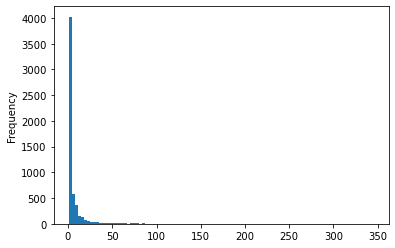

In [17]:
freq_table['n'].plot(kind='hist', bins=100)

In [18]:
freq_table.sort_values('n').tail(15)

,freq_prev,freq_next,tendency,n
word,,,,
funciones,0.493750,0.506250,0.012500,160.0
cargo,0.515528,0.484472,-0.031056,161.0
electoral,0.817143,0.182857,-0.634286,175.0
forma,0.477273,0.522727,0.045455,176.0
diputados,0.427778,0.572222,0.144444,180.0
congreso,0.375000,0.625000,0.250000,192.0
caso,0.651376,0.348624,-0.302752,218.0
personas,0.298643,0.701357,0.402715,221.0
nacional,0.560000,0.440000,-0.120000,225.0


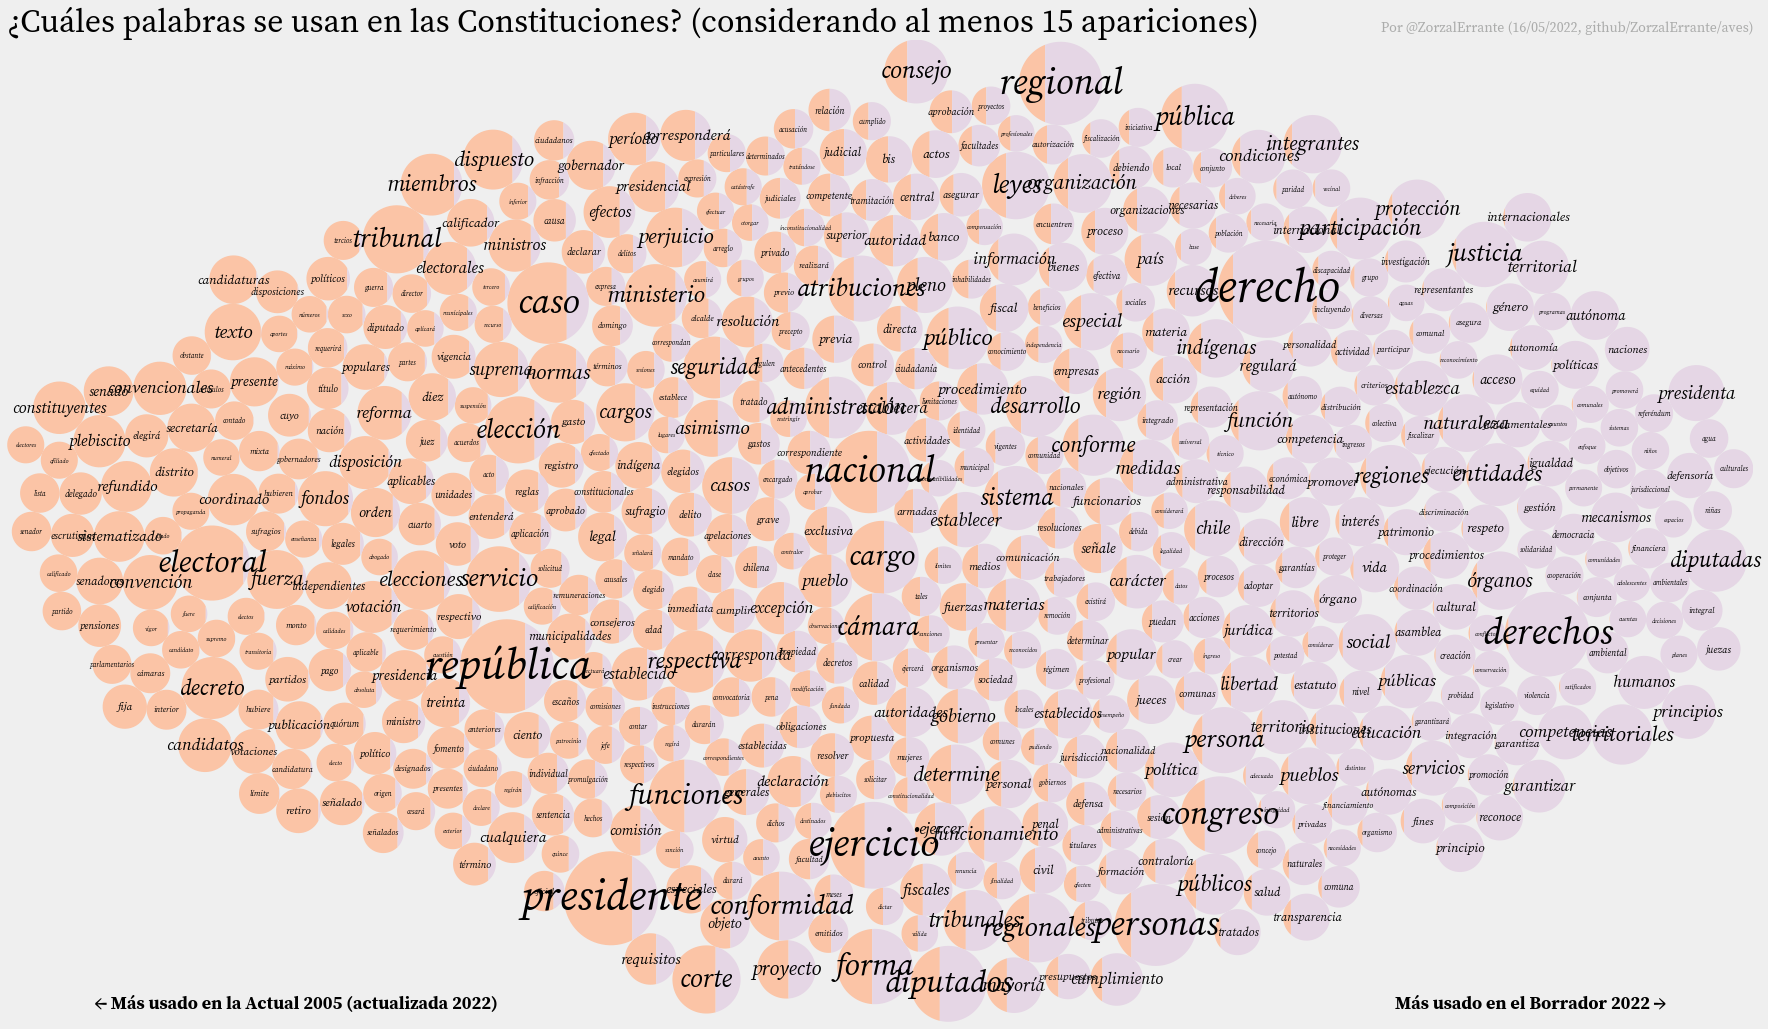

In [61]:
import matplotlib.pyplot as plt
from aves.visualization.tables import bubble_plot

fig, ax = plt.subplots(figsize=(24 * 1.2, 12 * 1.2))

left_color, right_color = ['#fbc4a6', '#e5d6e5']

bubble_plot(
    ax,
    freq_table[freq_table["n"] >= 15].reset_index().sort_values("n", ascending=False),
    "tendency",
    "n",
    label_column="word",
    palette="cool",
    dual=True,
    dual_left_color=left_color,
    dual_right_color=right_color,
    max_label_size=46,
    min_label_size=0,
    starting_y_range=3,
    margin=5,
    x_position_scaling=320,
    fontname="Source Serif Pro",
    fontstyle="italic",
)

ax.set_title(
    "¿Cuáles palabras se usan en las Constituciones? (considerando al menos 15 apariciones)",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=32,
)
ax.set_title(
    "Por @ZorzalErrante (16/05/2022, github/ZorzalErrante/aves)",
    loc="right",
    fontname="Source Serif Pro",
    fontsize=14,
    color="#abacab",
)
ax.set_axis_off()

ax.annotate(
    "Más usado en el Borrador 2022 →",
    (0.95, 0.01),
    xycoords="axes fraction",
    ha="right",
    va="bottom",
    fontsize=18,
    fontname="Source Serif Pro",
    fontweight="bold",
    color="black",
)
ax.annotate(
    "← Más usado en la Actual 2005 (actualizada 2022)",
    (0.05, 0.01),
    xycoords="axes fraction",
    ha="left",
    va="bottom",
    fontsize=18,
    fontname="Source Serif Pro",
    fontweight="bold",
    color="black",
)


fig.set_facecolor("#efefef")
fig.tight_layout()
fig.savefig('bubble_cloud_constitucional.png', dpi=150, bbox_inches='tight')

In [20]:
non_freq_words = freq_table[freq_table['n'] < 15].pipe(lambda x: x.mul(x['n'], axis='index')).drop(['tendency', 'n'], axis=1)
non_freq_words

,freq_prev,freq_next
word,,
abandono,1.0,2.0
abarca,0.0,1.0
abastecimiento,1.0,2.0
abierta,1.0,3.0
abierto,1.0,4.0
...,...,...
ñuble,2.0,0.0
ó,3.0,0.0
óptima,0.0,1.0


In [29]:
from aves.visualization.text import draw_wordcloud

In [44]:
from matplotlib.font_manager import FontProperties

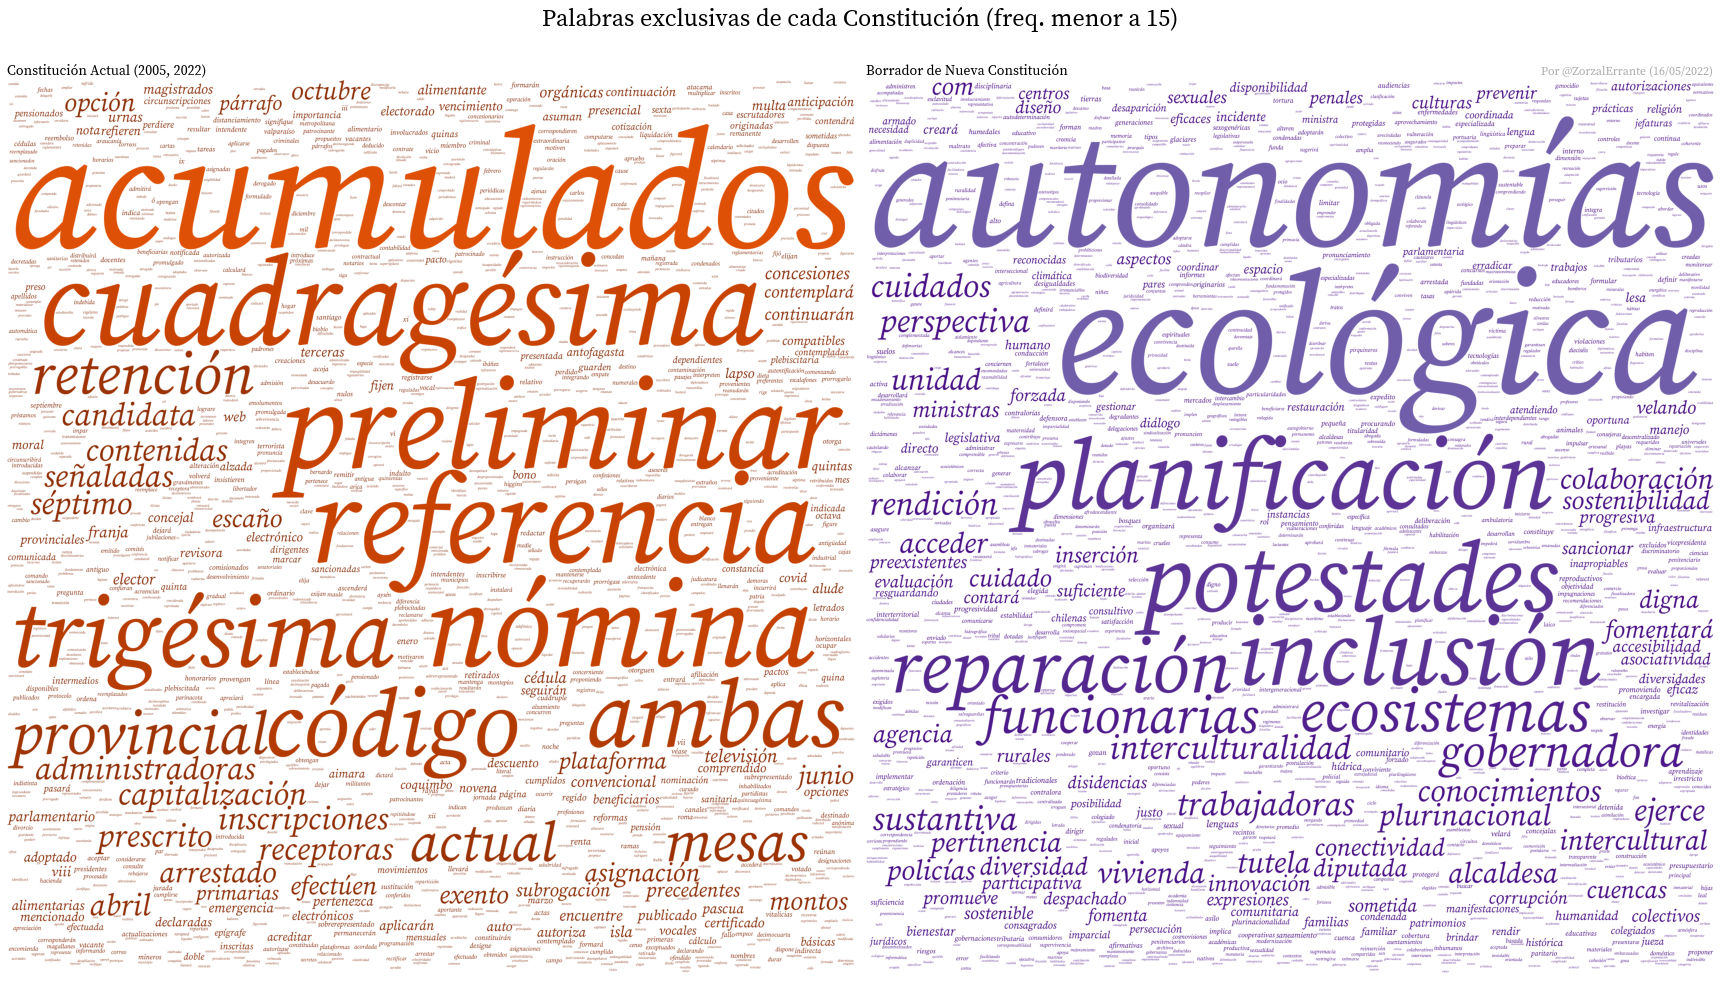

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16 * 1.5, 9 * 1.5))
axes = axes.flatten()

axes[0].set_title(
    "Constitución Actual (2005, 2022)",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=14,
)
axes[1].set_title(
    "Borrador de Nueva Constitución",
    loc="left",
    fontname="Source Serif Pro",
    fontsize=14,
)

axes[1].set_title(
    "Por @ZorzalErrante (16/05/2022)",
    loc="right",
    fontname="Source Serif Pro",
    fontsize=12,
    color="#abacab",
)
axes[0].set_axis_off()
axes[1].set_axis_off()

fig.suptitle(
    "Palabras exclusivas de cada Constitución (freq. menor a 15)",
    fontname="Source Serif Pro",
    fontsize=24,
    y=1.01
)

fig.tight_layout()

draw_wordcloud(
    axes[0],
    non_freq_words[non_freq_words["freq_next"] == 0]["freq_prev"].to_dict(),
    fontname=FontProperties(family="Source Serif Pro", style="italic"),
    cmap="Oranges_r",
    max_words=1500,
    relative_scaling=0.4,
)
draw_wordcloud(
    axes[1],
    non_freq_words[non_freq_words["freq_prev"] == 0]["freq_next"].to_dict(),
    fontname=FontProperties(family="Source Serif Pro", style="italic"),
    cmap="Purples_r",
    max_words=1500,
    relative_scaling=0.4,
)

fig.set_facecolor("white")
fig.savefig("word_cloud_constitucional.png", dpi=150, bbox_inches="tight")
